In [1]:
from model.model_utils import load_agent
from database.TradeHistory import get_session, History
from database.db_utils import get_recent_hist_df, history2indicator
import datetime
import pandas as pd

In [2]:
session = get_session()
past_time = datetime.datetime.utcnow() - datetime.timedelta(weeks=10)
df = get_recent_hist_df(past_time, session)
df

,id,side,price,size,exec_date,buy_child_order_acceptance_id,sell_child_order_acceptance_id
0,63554252,BUY,693465,0.799920,2017-10-31 13:07:12.447,JRF20171031-130711-071166,GPXHDO9I5EZ507GR
1,63554253,BUY,693466,0.005000,2017-10-31 13:07:12.447,JRF20171031-130711-071166,JRF20171031-130700-071144
2,63554254,BUY,693754,0.609600,2017-10-31 13:07:12.447,JRF20171031-130711-071166,JRF20171031-130712-525734
3,63554255,BUY,693761,0.201880,2017-10-31 13:07:12.447,JRF20171031-130711-071166,JRF20171031-130710-951759
4,63554264,BUY,693379,0.005395,2017-10-31 13:07:15.377,JRF20171031-130714-951764,JRF20171031-130714-034252
5,63554285,BUY,693378,0.099006,2017-10-31 13:07:17.960,JRF20171031-220718-129692,JRF20171031-130716-130333
6,63554286,BUY,693378,0.500000,2017-10-31 13:07:17.960,JRF20171031-220718-129692,JRF20171031-130717-610095
7,63554287,BUY,693379,0.000994,2017-10-31 13:07:17.960,JRF20171031-220718-129692,JRF20171031-130714-034252
8,63554289,BUY,693379,0.600001,2017-10-31 13:07:18.367,JRF20171031-220718-652117,JRF20171031-130714-034252
9,63554290,BUY,693379,0.393010,2017-10-31 13:07:18.490,JRF20171031-130718-610096,JRF20171031-130714-034252


In [3]:
def avg(p, n):
    return p.rolling(n).mean()

def std(p, n):
    return p.rolling(n).std()

def zs(p, n):
    return (p - p.rolling(n).mean()) / p.rolling(n).std()

In [4]:
df.exec_date = pd.to_datetime(df.exec_date)
df = df.set_index('exec_date')
df = df.loc['2000':]
df = df[['id', 'price', 'size']]

In [5]:
bench_price = df.price.resample('15Min').mean().fillna(method='ffill')
bench_size = df['size'].resample('15Min').sum().fillna(0)
dfb = pd.DataFrame([bench_price, bench_size]).T

p = dfb.price
v = dfb['size']

dfb['pma12'] = zs(p / avg(p, 12) - 1, 96)
dfb['pma96'] = zs(p / avg(p, 96) - 1, 96)
dfb['pma672'] = zs(p / avg(p, 672) - 1, 96)

dfb['ma4_36'] = zs(avg(p, 4) / avg(p, 36) - 1, 96)
dfb['ma12_96'] = zs(avg(p, 12) / avg(p, 96) - 1, 96)
dfb['ac12_12'] = zs((p / avg(p, 12)) / avg(p / avg(p, 12), 12), 96)
dfb['ac96_96'] = zs((p / avg(p, 96)) / avg(p / avg(p, 96), 12), 96)

dfb['vma12'] = zs(v / avg(v, 12) - 1, 96)
dfb['vma96'] = zs(v / avg(v, 96) - 1, 96)
dfb['vma672'] = zs(v / avg(v, 672) - 1, 96)

dfb['vZ12'] = zs(v, 12)
dfb['vZ96'] = zs(v, 96)
dfb['vZ672'] = zs(v, 672)

dfb['r'] = 0
dfb['r_1'] = 0
dfb['r_2'] = 0
dfb['state'] = 0

dfb['pZ12'] = zs(p, 12)
dfb['pZ96'] = zs(p, 96)
dfb['vol12'] = zs(std(p, 12), 96)
dfb['vol96'] = zs(std(p, 96), 96)
dfb['vol672'] = zs(std(p, 672), 96)
dfb['dv12_96'] = zs(std(p, 12) / avg(std(p, 12), 96), 96)
dfb['dv96_672'] = zs(std(p, 96) / avg(std(p, 96), 672), 96)
dfb['utctime'] = (dfb.index.hour * 4 + dfb.index.minute / 15) / 96
dfb

,price,size,pma12,pma96,pma672,ma4_36,ma12_96,ac12_12,ac96_96,vma12,...,r_2,state,pZ12,pZ96,vol12,vol96,vol672,dv12_96,dv96_672,utctime
exec_date,,,,,,,,,,,,,,,,,,,,,
2017-10-31 13:00:00,6.934650e+05,66.922481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.541667
2017-10-31 13:15:00,6.937371e+05,134.246144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.552083
2017-10-31 13:30:00,6.970158e+05,551.347834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.562500
2017-10-31 13:45:00,7.011755e+05,979.207994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.572917
2017-10-31 14:00:00,7.069177e+05,1047.829626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583333
2017-10-31 14:15:00,7.076892e+05,458.228593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.593750
2017-10-31 14:30:00,7.110141e+05,720.761693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.604167
2017-10-31 14:45:00,7.114780e+05,383.505914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.614583
2017-10-31 15:00:00,7.097928e+05,485.050414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625000


In [6]:
indicator = dfb.reset_index().loc[:,'pma12':'utctime']
price_history = dfb.reset_index().price
indicator.loc[862:].isnull().apply(pd.value_counts).T

,False
pma12,5834
pma96,5834
pma672,5834
ma4_36,5834
ma12_96,5834
ac12_12,5834
ac96_96,5834
vma12,5834
vma96,5834
vma672,5834


In [7]:
from matplotlib import pyplot as plt
from gym import spaces
import chainerrl
import chainer
%matplotlib inline

In [8]:
%load_ext autoreload
%autoreload 2

In [25]:
import model.TradeModel2 as mymodel

obs_size = mymodel.TradeEnv.OBS_SIZE
n_actions = mymodel.TradeEnv.ACTIONS

n_hidden_channels = obs_size * 10
n_hidden_layers = 10
# 幅n_hidden_channels，隠れ層n_hidden_layersのネットワーク
q_func = chainerrl.q_functions.FCStateQFunctionWithDiscreteAction(
    obs_size, n_actions, n_hidden_channels, n_hidden_layers
)

# 最適化関数の設定
optimizer = chainer.optimizers.Adam(1e-2)
optimizer.setup(q_func)

# 割引率の設定
gamma = 0.98

# 探索方針の設定
explorer = chainerrl.explorers.ConstantEpsilonGreedy(
    epsilon=0.3, random_action_func=spaces.Discrete(n_actions).sample
)

replay_buffer = chainerrl.replay_buffer.ReplayBuffer(10 ** 6)

agent = chainerrl.agents.DoubleDQN(
    q_func, optimizer, replay_buffer, gamma, explorer,
    replay_start_size=500
)

agent.load('agent/result_7/2000')
env = mymodel.TradeEnv(price_history, indicator)

In [26]:
obs = env.reset()
env.index = 862 + 4000
done = False
R = 0
t = 0
jpy = 40000
btc = 0
com = 0.15 / 100
state = 0
x = []
y_r = []
y_jpy = []
actions = {}
action_list = []
while not done and t < 10000:
    # env.render()
    act = agent.act(obs)
    price = env.price[env.index]
#     print(price, jpy + btc * price)
#     print(act, jpy, btc, price)
    diff = abs(act - state)
    if act < state:
        sell_btc = diff
        jpy += btc * sell_btc / state * (price * (1 - com))
        btc -= btc * sell_btc / state
    elif state < act:
        sell_jpy = diff
        btc += jpy * sell_jpy / (4 - state) / (price * (1 + com))
        jpy -= jpy * sell_jpy / (4 - state)
    state = act
    obs, r, done, _ = env.step(act)
    actions[act] = actions.get(act, 0) + 1
    action_list.append(act)
    R += r
    t += 1
    x.append(t)
    y_r.append(R)
    y_jpy.append(jpy + btc * price)
agent.stop_episode()
R, jpy + btc * price

(5.0, 38337.182819700676)

In [27]:
actions

{4: 1831}

In [13]:
t

5831

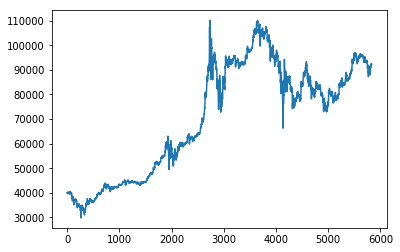

In [14]:
plt.plot(x, y_jpy)

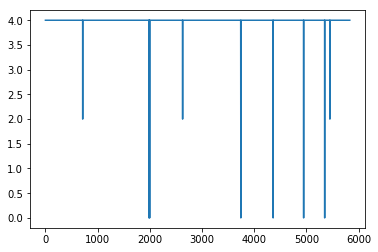

In [20]:
plt.plot(x, action_list)

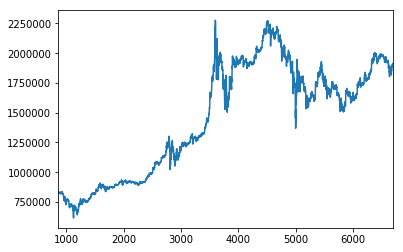

In [16]:
price_history[862:].plot()

In [183]:
(price_history[862 + t] / price_history[862]) * 40000

43327.527245045967

In [70]:
(price_history / price_history.shift() - 1).abs().mean()

0.003574349099547377

In [157]:
(price_history / price_history.shift(200) - 1).mean()

0.0237068035568321